In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
#Gathering exchange rates of currecies to GBP

currencies_to_GBP_rates={}

with open('exchange_rate.csv', 'r') as rates:
    reader = csv.reader(rates)
    for row in reader:
        
        rate=row[0]
        from_conv=row[1]
        to_conv=row[2]     
        
        if to_conv=='GBP':
            currencies_to_GBP_rates[from_conv]=rate

In [3]:
print(currencies_to_GBP_rates)

{'USD': '0.797235', 'EUR': '0.85142034', 'AUD': '0.6061227', 'CAD': '0.59837455', 'NZD': '0.558284', 'KRW': '0.0007161299', 'KWD': '2.61626', 'VUV': '0.0073631303', 'JPY': '0.007160577', 'GBP': '1'}


In [4]:
#Gathering dimension values of each ID

id_dim_vals={}

dims={d:[] for d in range(1,4)}

with open('dimensions.csv', 'r') as rates:
    reader = csv.reader(rates)
    header=True
    for row in reader:
        if header is False:
            
            id_=str(row[0])
            id_=id_.replace('e','E')
            id_=int(float(id_))
            
            dim=row[1]
            dim=dim.replace('Dim','')
            dim=int(dim)
                        
            val=float(row[2])
            dims[dim].append(val)
            
            if id_ in id_dim_vals:
                id_dim_vals[id_][dim]=val
            else:
                id_dim_vals[id_]={d:0 for d in range(1,4)}
                id_dim_vals[id_][dim]=val
                        
        header=False

In [5]:
#Getting averages of missing dimension values

dim_avgs={d:float("{0:.2f}".format(np.mean(dims[d]))) for d in range(1,4)}
print(dim_avgs)

{1: 5.73, 2: 5.73, 3: 3.54}


In [6]:
#Filling missing dimension values of IDs

id_dim_vals_with_avgs={}

for idx in id_dim_vals.keys():
    
    id_dim_vals_with_avgs[idx]={d:0 for d in range(1,4)}
    
    for d in range(1,4):
        
        if id_dim_vals[idx][d]==0:
        
            id_dim_vals_with_avgs[idx][d]=dim_avgs[d]
            
        else:
            
            id_dim_vals_with_avgs[idx][d]=id_dim_vals[idx][d]
    
    

In [7]:
print(id_dim_vals_with_avgs)

{1: {1: 3.95, 2: 5.73, 3: 2.43}, 2: {1: 3.89, 2: 3.84, 3: 3.54}, 3: {1: 4.05, 2: 4.07, 3: 2.31}, 4: {1: 4.2, 2: 5.73, 3: 2.63}, 5: {1: 4.34, 2: 5.73, 3: 3.54}, 6: {1: 3.94, 2: 5.73, 3: 3.54}, 7: {1: 3.95, 2: 3.98, 3: 3.54}, 8: {1: 4.07, 2: 5.73, 3: 3.54}, 9: {1: 5.73, 2: 3.78, 3: 2.49}, 10: {1: 4.0, 2: 4.05, 3: 3.54}, 11: {1: 4.25, 2: 4.28, 3: 2.73}, 12: {1: 3.93, 2: 5.73, 3: 2.46}, 13: {1: 3.88, 2: 3.84, 3: 2.33}, 14: {1: 4.35, 2: 4.37, 3: 2.71}, 15: {1: 5.73, 2: 5.73, 3: 2.27}, 16: {1: 5.73, 2: 4.42, 3: 2.68}, 17: {1: 4.31, 2: 4.34, 3: 2.68}, 18: {1: 4.23, 2: 4.29, 3: 3.54}, 19: {1: 5.73, 2: 4.26, 3: 3.54}, 20: {1: 4.21, 2: 4.27, 3: 2.66}, 21: {1: 4.26, 2: 4.3, 3: 3.54}, 22: {1: 5.73, 2: 3.92, 3: 2.48}, 23: {1: 3.94, 2: 3.96, 3: 2.41}, 24: {1: 4.39, 2: 4.43, 3: 2.62}, 25: {1: 4.44, 2: 4.47, 3: 2.59}, 26: {1: 5.73, 2: 4.01, 3: 2.41}, 27: {1: 5.73, 2: 3.94, 3: 2.47}, 28: {1: 4.28, 2: 5.73, 3: 2.67}, 29: {1: 5.73, 2: 3.97, 3: 2.4}, 30: {1: 3.96, 2: 3.99, 3: 2.42}, 31: {1: 5.73, 2: 4.03,

In [8]:
#Loading dataset

d_frame=pd.read_csv("train_set.csv",sep=",")

prices=d_frame['Price']
price_format=d_frame['Currency']

d_frame=d_frame.drop('Price',axis=1)
d_frame=d_frame.drop('Currency',axis=1)
d_frame.head(10)

,X2,X3,X4,X5,X6,ID
0,E_A,SI2,61.5,55.0,0.23,50917.0
1,C_A,VS1,56.9,65.0,0.23,20554.0
2,B_T,VS2,62.4,58.0,0.29,48880.0
3,C_P,SI2,63.3,58.0,0.31,12844.0
4,D_P,VVS2,62.8,57.0,0.24,44461.0
5,D_T,VVS1,62.3,57.0,NaN,25594.0
6,D_C,NaN,61.9,55.0,0.26,19800.0
7,A_A,VS2,65.1,61.0,0.22,28155.0
8,C_P,SI1,64.0,55.0,0.30,26249.0
9,E_P,VS1,62.8,56.0,0.23,51418.0


In [9]:
#Converting prices and normalzing them

y_data=[]

curr_format=price_format.values
prices=prices.values

for idx,price in enumerate(prices):

    conv_rate=float(currencies_to_GBP_rates[curr_format[idx]])
    
    y_data.append(float(price*conv_rate))

In [10]:
print(y_data)

[325.9999993800621, 326.99999937816045, 334.0000002313685, 335.00000096999247, 336.0000068086032, 336.0, 337.0000009757835, 337.0000002334466, 339.0000002348321, 339.999999353439, 344.00000099605205, 345.0000069909765, 348.0000002410665, 351.00000024314477, 351.0000010163205, 351.0000010163205, 352.99999932871754, 353.0, 353.0000071530861, 354.00000024522285, 355.00000102790256, 357.00000723414087, 357.0, 402.00000116399104, 402.0, 402.0000081460074, 402.0, 402.99999923363504, 402.99999923363504, 403.00000816627113, 403.00000027916616, 403.00000027916616, 403.00000816627113, 403.00000816627113, 403.0, 403.9999992317334, 404.0000002798589, 403.9999992317334, 404.00000818653484, 404.0, 404.0000002798589, 405.0000002805516, 405.0, 405.0000011726775, 551.9999989502892, 552.0, 552.0000015983161, 553.0, 552.9999989483874, 552.9999989483874, 554.000000383767, 554.0, 553.9999989464858, 554.0000112260899, 554.0000112260899, 554.0000016041072, 554.0000016041072, 554.0000112260899, 554.0000016041

In [11]:
from pandas.api.types import is_numeric_dtype

In [16]:
#Updting missing values

for clm in d_frame:
    
    data_clm=d_frame[clm]
    data_clm=data_clm.dropna()

    if clm!='ID':
        
        if is_numeric_dtype(data_clm):

            data_mean=np.mean(data_clm.values)
            d_frame[clm]=d_frame[clm].fillna(data_mean)
            print(clm,data_mean)
            
        else:
            
            clm_vals=list(data_clm.values)
            mean_val=max(clm_vals,key=clm_vals.count)
            d_frame[clm]=d_frame[clm].fillna(mean_val)
                        
            print (clm,mean_val)
    

X2 E_Y
X3 SI1
X4 61.7487168622
X5 57.4533462221
X6 0.799362700148


In [17]:
d_frame.head(10)

,X2,X3,X4,X5,X6,ID
0,E_A,SI2,61.5,55.0,0.230000,50917.0
1,C_A,VS1,56.9,65.0,0.230000,20554.0
2,B_T,VS2,62.4,58.0,0.290000,48880.0
3,C_P,SI2,63.3,58.0,0.310000,12844.0
4,D_P,VVS2,62.8,57.0,0.240000,44461.0
5,D_T,VVS1,62.3,57.0,0.799363,25594.0
6,D_C,SI1,61.9,55.0,0.260000,19800.0
7,A_A,VS2,65.1,61.0,0.220000,28155.0
8,C_P,SI1,64.0,55.0,0.300000,26249.0
9,E_P,VS1,62.8,56.0,0.230000,51418.0


In [18]:
data_id=d_frame['ID']
d_frame=d_frame.drop('ID',axis=1)
data_id=data_id.values

In [19]:
d_frame.head(10)

,X2,X3,X4,X5,X6
0,E_A,SI2,61.5,55.0,0.230000
1,C_A,VS1,56.9,65.0,0.230000
2,B_T,VS2,62.4,58.0,0.290000
3,C_P,SI2,63.3,58.0,0.310000
4,D_P,VVS2,62.8,57.0,0.240000
5,D_T,VVS1,62.3,57.0,0.799363
6,D_C,SI1,61.9,55.0,0.260000
7,A_A,VS2,65.1,61.0,0.220000
8,C_P,SI1,64.0,55.0,0.300000
9,E_P,VS1,62.8,56.0,0.230000


In [26]:
d1=[]
d2=[]
d3=[]

for d_id in data_id:
    
    d_id=int(d_id)
    
    if d_id in id_dim_vals_with_avgs.keys():
    
        d1.append(id_dim_vals_with_avgs[d_id][1])
        d2.append(id_dim_vals_with_avgs[d_id][2])
        d3.append(id_dim_vals_with_avgs[d_id][3])
        
    else:
    
        d1.append(dim_avgs[1])
        d2.append(dim_avgs[2])
        d3.append(dim_avgs[3])

In [29]:
d_frame['D1']=d1
d_frame['D2']=d2
d_frame['D3']=d3

In [30]:
d_frame.head(10)

,X2,X3,X4,X5,X6,d1,d2,d3
0,E_A,SI2,61.5,55.0,0.230000,5.39,5.35,3.24
1,C_A,VS1,56.9,65.0,0.230000,6.50,6.52,4.03
2,B_T,VS2,62.4,58.0,0.290000,5.29,5.31,3.28
3,C_P,SI2,63.3,58.0,0.310000,6.92,6.85,4.27
4,D_P,VVS2,62.8,57.0,0.240000,5.24,5.29,3.25
5,D_T,VVS1,62.3,57.0,0.799363,5.73,7.48,4.59
6,D_C,SI1,61.9,55.0,0.260000,5.73,5.73,4.57
7,A_A,VS2,65.1,61.0,0.220000,4.32,4.35,3.54
8,C_P,SI1,64.0,55.0,0.300000,8.80,8.33,4.81
9,E_P,VS1,62.8,56.0,0.230000,5.55,5.73,3.39


In [39]:
#Adding One hot encoding arrays to data

one_hot_X2=pd.get_dummies(d_frame['X2'])
d_frame=d_frame.drop('X2',axis=1)
d_frame=d_frame.join(one_hot_X2)

one_hot_X3=pd.get_dummies(d_frame['X3'])
d_frame=d_frame.drop('X3',axis=1)
d_frame=d_frame.join(one_hot_X3)

In [40]:
d_frame.head(10)

,X4,X5,X6,d1,d2,d3,A_A,A_C,A_P,A_R,...,E_X,E_Y,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,61.5,55.0,0.230000,5.39,5.35,3.24,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,56.9,65.0,0.230000,6.50,6.52,4.03,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,62.4,58.0,0.290000,5.29,5.31,3.28,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,63.3,58.0,0.310000,6.92,6.85,4.27,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,62.8,57.0,0.240000,5.24,5.29,3.25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,62.3,57.0,0.799363,5.73,7.48,4.59,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,61.9,55.0,0.260000,5.73,5.73,4.57,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,65.1,61.0,0.220000,4.32,4.35,3.54,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,64.0,55.0,0.300000,8.80,8.33,4.81,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,62.8,56.0,0.230000,5.55,5.73,3.39,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
x_data=d_frame.values

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)

In [44]:
print(np.shape(x_train),np.shape(y_train),np.shape(x_test),np.shape(y_test))

(28319, 49) (28319,) (9440, 49) (9440,)


In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
rf_regressor=RandomForestRegressor()

In [47]:
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [49]:
predictions = rf_regressor.predict(x_test)
rf_regressor.score(x_test,y_test)

0.69426539415248611

In [66]:
# hyperparameter tuning
n_estimators=[i for i in range(10,110,20)]
rf_accuracies=[]

for est in n_estimators:
    rf_regressor=RandomForestRegressor()
    print("Training on",est," sized forest")
    rf_regressor.fit(x_train,y_train)
    rf_accuracies.append(rf_regressor.score(x_test,y_test))
    
print("The most accurate model is with ",n_estimators[np.argmax(rf_accuracies)]," with accuracy",np.max(rf_accuracies))
print(rf_accuracies)

Training on 10  sized forest
Training on 30  sized forest
Training on 50  sized forest
Training on 70  sized forest
Training on 90  sized forest
The most accurate model is with  30  with accuracy 0.70518200383
[0.69383444236062009, 0.70518200382968277, 0.69407562520731458, 0.69551314348129489, 0.69775099395322093]


In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr=LinearRegression()

In [55]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
lr.score(x_test,y_test)

0.66416586306290015

In [69]:
lr_accuracies=[lr.score(x_test,y_test) for i in range(0,5)]
print(lr_accuracies)

[0.66416586306290015, 0.66416586306290015, 0.66416586306290015, 0.66416586306290015, 0.66416586306290015]


In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
knn_regressor=KNeighborsRegressor()

In [59]:
knn_regressor.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [60]:
knn_regressor.score(x_test,y_test)

0.34858826979288071

In [71]:
k_neighbors=[i for i in range(3,21,4)]
knn_accuracies=[]

for neighbors in k_neighbors:
    knn = KNeighborsRegressor(n_neighbors=neighbors)
    print("Training on",neighbors,"neighbors")
    knn.fit(x_train, y_train)
    knn_accuracies.append(knn.score(x_test,y_test))

print("The most accurate model is with ",k_neighbors[np.argmax(knn_accuracies)]," neighbors with accuracy",np.max(knn_accuracies))
print(knn_accuracies)

Training on 3 neighbors
Training on 7 neighbors
Training on 11 neighbors
Training on 15 neighbors
Training on 19 neighbors
The most accurate model is with  19  neighbors with accuracy 0.388234619295
[0.29239041308715019, 0.37085019748087455, 0.3845186676392508, 0.38763307577122219, 0.38823461929479086]


In [62]:
from sklearn.neural_network import MLPRegressor

In [63]:
mlp_reg=MLPRegressor()

In [64]:
mlp_reg.fit(x_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [65]:
mlp_reg.score(x_test,y_test)

0.66569802941335554

In [72]:
layer_sizes=[(50*i,100*i) for i in range(1,6,1)]
mlp_accuracies=[]

for layers in layer_sizes:
    mlp_clf=MLPRegressor(hidden_layer_sizes=layers)
    print("Training on",layers," layer sizes")
    mlp_clf.fit(x_train, y_train)
    mlp_accuracies.append(mlp_clf.score(x_test,y_test))

print("The most accurate model is with ",layer_sizes[np.argmax(mlp_accuracies)]," iteration with accuracy",np.max(mlp_accuracies))
print(mlp_accuracies)

Training on (50, 100)  layer sizes
Training on (100, 200)  layer sizes
Training on (150, 300)  layer sizes
Training on (200, 400)  layer sizes
Training on (250, 500)  layer sizes
The most accurate model is with  (100, 200)  iteration with accuracy 0.7142607861
[0.70743584494967848, 0.71426078610019905, 0.70531774854205798, 0.70648897863347204, 0.70414588367269237]


In [81]:
mlp_reg=MLPRegressor(hidden_layer_sizes=(100,200,100))
mlp_reg.fit(x_train,y_train)
preds=mlp_reg.predict(x_test)
mlp_reg.score(x_test,y_test)

0.70859713138819469

In [82]:
for idx,org in enumerate(y_test):
    print(org,preds[idx])

9385.000190174824 9761.34369029
605.0000017517775 628.012538596
1772.9999966283744 2060.87829089
14482.000041932632 12019.5456553
489.0 667.993818226
11583.999977971285 11240.4196688
2277.0000015773235 3244.83422812
4962.999990562111 4259.68805256
868.0000175888916 3309.83438743
8969.0 8406.69719063
729.9999986117954 670.40355536
893.000000618599 691.233387159
4672.000003236388 4919.38982672
606.0000122798021 930.561071177
11190.0 11925.3635272
3804.000011014482 3588.87521714
3753.9999928612056 5422.18768423
3199.9999939147197 3070.72813053
14639.0 12303.287681
4277.000012384054 5283.18186917
589.0 3149.41022252
1076.0000007453668 4034.39939842
8445.0 7346.20926507
2039.0000059039246 3986.16716935
12499.000008658306 11643.4480892
3014.0000087270373 3015.43203325
814.000002356937 841.340365693
6549.000132706971 3211.60221263
7861.999985049228 9392.32556026
7520.000152383024 7422.5177293
816.0 3650.22052257
864.00000059851 3367.19019662
1243.000025187779 1809.2059139
1869.0000012946937 2

5183.000105026757 5553.10840596
3933.000079697132 4265.31324215
2889.0 3700.09647359
3877.000011225854 3644.32931689
11028.0 11444.1177363
1260.9999976020192 1236.75716107
4816.000003336139 5519.33049939
2548.000007377734 2798.96755551
7388.999985948708 3691.07075781
2939.000002035904 2664.16693697
665.999998733501 814.634167557
1763.0000357249032 1848.94011132
11062.00022415705 3787.12175125
5584.000113152501 6729.03252019
2803.000056799151 3150.95628536
2162.000043810119 1637.21492916
4001.0 3337.19555871
4413.000089423708 4848.87067184
4118.000083445916 4777.56353077
956.9999981801209 823.687345441
655.0 582.57101131
10035.99998091504 11365.2264205
802.0000023221911 668.146476925
6960.999986762614 7411.63668704
5516.000015971578 5016.06338355
13480.000009337866 14255.0446181
628.0000127256036 3711.88738292
4287.0 4579.34533921
4443.999991549067 6295.43501528
5889.0 6149.16905103
4077.0000118049534 3701.17794827
2797.0 3985.04437481
2745.999994778069 2933.16526893
1904.000001318939 2

874.0000177104738 796.810153388
3361.9999936066524 3084.73851839
596.0 760.013299156
9926.000006875938 8417.9875274
906.0000026233231 861.156135668
1025.999998048907 981.212890139
1558.0000010792578 2045.78965638
3817.9999927395 4430.82737866
5780.999989006561 5471.13062339
4498.0 5934.39835916
2723.0000018862766 3579.56388931
6468.0 3764.33798315
17253.99996718893 15144.3318584
1007.9999980831368 2060.25507369
660.0000133740419 863.784862598
692.0000020036861 942.517647387
805.0000023308775 785.703887893
2226.0000015419946 3550.0981336
1033.000020932402 3412.37172172
603.0000017459865 567.502264378
4553.000092260627 3731.34275168
4887.000099028703 5494.97448747
706.9999986555334 689.793751981
526.0000015230329 603.717543793
6031.0 8258.47440904
2319.999995588172 2609.50128882
1269.0000008790616 996.933840811
773.0000005354725 925.352642438
981.0000028404855 955.153344066
1715.0000049657826 2218.49740653
4804.000013909982 4928.1688655
12078.99997702997 11632.4719145
941.0 1106.75410205

3016.999994262722 2844.13875384
926.0000006414587 898.093504254
620.0000017952101 512.185570624
4250.0 6851.87747053
723.0000146506552 880.210248096
3599.0000104209043 3278.6553826
11686.000236801598 11318.4398752
602.999998853305 968.3425236
697.0000020181636 1048.75270872
1817.9999965428003 1742.61981721
1364.0000009448702 3374.56604809
1914.99999635834 2248.20735639
965.0000006684747 846.814883089
13642.000039500412 12244.1690165
6337.999987947342 4610.98807139
1119.0000032400646 1975.66777775
1076.0 1065.59335406
840.0000024322201 850.663408846
817.9999984444503 819.975777575
5407.0 7530.79996805
1442.999997255919 1511.78950156
1308.0000265049196 1645.08199445
2104.999995997027 2434.90895913
3770.000010916035 4238.42256553
4620.000003200366 5114.17527773
3911.0000792513306 4089.29642697
12531.000008680474 3341.0553244
2191.999995831583 3071.30359447
885.0 1100.12946236
2366.9999954987943 3568.1199996
697.9999986726482 835.091880508
5273.000015267971 3366.82373202
948.0000027449341 

687.0000004758986 1178.3355853
2111.0 1418.18854347
1080.0 710.207225968
1093.0 3582.81646213
906.0000183589121 892.557279112
1190.000000824337 1497.59161172
988.0000200205355 3895.30629209
8190.000005673377 9473.79603924
427.0000012363786 622.218989414
3370.0 2692.55187033
8879.0 7270.58021383
4037.000011689134 4347.1993463
770.0000022295351 842.227646568
774.9999985262212 1077.48794576
3098.9999941067867 4470.16496644
945.0000191491965 923.037416001
8955.000181461435 4173.69881216
895.0 1576.94620421
4081.00000282699 3609.37004854
5659.0 5863.25006809
974.0000197368437 889.088515066
2579.0000074674945 3350.47098957
6317.999987985375 6448.09513481
4039.0000116949245 2664.36482065
2196.000006358518 2777.16243481
1391.0 3351.92470184
1289.000000892916 1306.71108872
3748.999992870714 2958.05505563
2041.0000413582118 1384.83359462
1190.000024113803 3464.95295599
6485.999987665898 3185.57774271
4531.000013119511 4258.87360234
2230.000006456965 1429.35591063
645.999998771534 3460.01331833
8

449.00000909840134 986.629890606
1623.9999969117202 1397.09291357
7209.000004993819 7274.87145294
4688.000094996226 5196.89868169
420.00000029094235 759.801141823
1844.9999964914557 1405.70574285
625.0000018096874 724.508310808
419.00000029024966 373.257643465
3354.000002323383 2491.05876042
4362.0 4797.08214756
17525.000012139917 18471.2695916
6368.000004411241 6759.63373385
4712.000003264096 3920.73229406
720.000014589864 714.326949736
2395.0000069347225 3086.75147886
581.0000016822854 964.053903298
8532.000172889888 7225.87881832
7063.000020450916 5411.076818
873.0000176902101 745.053387297
4764.000096536267 3231.27800649
4673.00009469227 3900.31115765
730.0 791.233097367
935.0000027072925 1035.81480147
3293.000002281127 5605.5058189
5096.0 4976.73698456
591.9999988742231 773.253794157
6132.0000177552065 7900.72720955
4089.0000828582697 4557.2100424
2063.000041804013 2413.52756012
851.0000005895047 3158.67246055
2709.9999948465284 2670.94619752
5937.000004112679 5703.95401719
5765.0

769.0000005327016 628.303874313
1773.00003592754 1581.81878322
2136.999995936174 1992.0256526
9492.00019234304 7028.39772552
14084.000009756268 11953.2133174
1061.0000214997858 1426.64164584
984.0 714.132876146
4084.0000827569515 2565.50412702
3450.000002389884 4497.24031438
6327.999987966358 5346.32583638
3574.999993201601 3790.92510657
1027.999998045104 1371.59387203
742.0000021484611 557.282857914
16400.0 14592.1825445
2161.0000437898557 2986.11870732
7477.000021649654 6513.53239666
11430.00000791779 11369.6572812
801.9999984748766 624.330219586
4717.000095583872 4947.75453064
14666.999972108499 8133.84517374
625.0000018096874 655.035502364
14524.999972378533 7849.0430033
2352.9999955254175 2618.30797662
5047.000014613589 7304.38496706
7137.0 5335.61623365
854.0000005915829 950.405079006
1425.9999972882472 3147.14391169
5672.000114935706 6258.38050169
828.0000023974741 719.376796863
2542.000007360361 3345.67157349
2724.000055198319 3217.00105865
2185.0000015135934 3813.01268615
1166

1723.0000049889466 1839.46609535
5939.000004114065 3477.42848225
1369.0 1801.44279372
2708.0 3112.39283546
4972.0 4547.74048085
18532.000012837485 17643.8028925
526.0000003643707 848.669262902
969.0 923.694748132
4189.00008488464 3459.82276968
6539.0000045296965 3072.2881002
1435.9999972692306 3099.98523798
16959.999967748015 14321.923744
658.0000004558096 939.004679022
9971.00002887103 3198.83955724
3911.0000792513306 3322.15327901
4296.000087052856 4243.3239712
1612.000004667546 1393.11939406
2362.0000016362046 3354.81996004
2872.9999945365594 3182.1486718
9428.000191046163 10512.0453001
651.0 591.843473803
694.0000140630078 576.179153544
4125.000083587763 4614.28145049
1637.0000011339828 1539.00320912
2543.000007363257 2757.03253768
3455.999993427897 2901.35044477
6852.000004746517 4692.99635493
4068.0000824327317 4038.18545381
3835.0 3989.11631071
1957.0000396560613 1679.74509175
720.0 631.484765921
2475.0 2771.63790324
2732.0000553604286 2706.73400419
900.0000006234479 667.3817866

977.0000028289035 761.570126271
2650.000007673075 3464.29515869
1588.9999969782782 1352.54110723
596.000001725718 914.608380275
886.0000179536382 770.569434249
6894.999986888123 7885.92666239
2513.0 2910.01926604
1050.000021276885 1045.53759822
10378.0000300495 3856.08405244
5113.0 5570.01601552
4751.000096272839 4450.73226544
2001.0000057938955 1726.61914352
1043.0 1365.26258992
7275.999986163594 4553.74882049
1043.0 1008.28156173
878.0000177915286 566.129794078
6225.000018024487 6377.3348327
451.00000913892865 568.517261183
2713.000054975418 2936.93265077
1237.0000008568948 3144.3038282
6400.9999878275385 3462.29214241
3477.9999933860613 3733.68492133
1127.9999978549386 3255.93989579
1001.0 872.945568277
16364.000011335671 3310.21238512
4032.0000817032383 4283.75335223
552.0 568.632059312
697.9999986726482 895.103586027
1786.0000361909683 3119.50518988
911.0 689.944668557
3053.0 2475.12932801
1715.9999967367685 1372.10795058
557.9999989388793 503.841858619
3941.0 3995.4518518
1316.0 

1010.0000204663369 931.513127854
1238.0 4168.35908871
14593.000295708174 10728.8904568
453.0 522.253064945
2385.999995462663 2896.63340701
1338.0000271128308 1918.97782835
4095.0 2998.37130548
7845.000022715198 6584.11209789
4689.0 5809.54178359
9585.999981770781 3121.78622893
1171.999997771266 1854.23022639
1144.9999978226106 1660.42911048
648.0 3494.89932473
1779.0 1625.59964172
829.000000574265 1549.62407216
1274.0 3313.66366905
491.00000142169046 3355.08999726
1181.0000034195855 1542.47247286
1378.0000009545681 3858.22674091
2460.0000071229297 1395.25266885
2057.000001424925 3065.21488849
5361.0 3465.47494239
1653.0000011450659 1501.80425881
577.0 649.833194605
936.0000006483859 965.513194202
2622.000007592001 3376.03866349
1436.000000994746 1954.47433033
6619.000004585113 5469.97553532
637.9999987867473 937.930348426
11745.999977663218 2544.57911519
7085.999986524907 7710.47757855
4999.9999904917495 5079.6552403
646.0 719.588790917
2327.0000067378287 3001.12127384
12799.9999756588

734.000002125297 777.386469949
981.9999981325797 2767.44764388
491.00000034012555 1113.60640482
1692.0000011720822 3318.77630749
1777.9999966188664 1863.58187103
863.0000005978172 807.317973519
1438.9999972635255 1240.34799987
3534.000071611916 3745.81546365
1069.0000216618953 939.45105724
8006.000005545917 3557.36755808
4796.000013886819 3775.00666884
5199.000105350976 4847.00952344
2421.0000490584175 2946.8768254
1816.0 2008.62296914
1139.9999978321189 1634.03010241
790.9999984957948 4898.31938321
470.00000032557836 534.726346266
9281.0001880674 3265.45395565
6277.000127195246 6094.23890614
778.0 3492.92840848
13307.000038530417 10063.3736411
5179.000014995795 5740.21833928
789.0000159880593 536.181865386
624.9999988114687 582.603226425
944.0 795.571278388
604.9999988495017 999.354937607
666.0000004613515 1094.58994864
11062.00022415705 6790.07145019
7527.999985684378 6388.55600707
1839.999996500964 1937.29710127
10499.000007272867 12790.2151895
984.0000199394807 705.820435969
540.0 

2350.999995529221 3213.93749547
4244.000002939903 3710.13482344
828.0000167783436 697.683355525
1046.0 682.597660703
6652.000004607973 6247.52682504
2981.9999943292796 3240.34739426
4200.0 6594.94782577
2977.0000603250346 1580.35445026
5005.0 5140.64597031
3646.0000105569934 4344.54985753
2818.000008159519 4106.43146246
1946.000005634643 1625.45722277
827.0 3099.51775473
526.0000003643707 683.640853175
595.0000017228225 682.289032053
17366.000012029774 13746.3464509
2238.9999957422056 4162.62916666
15529.0 13181.1647958
945.0000191491965 916.80052149
8381.000024267185 7371.44321697
4197.000085046749 4541.61738957
942.0000190884053 3580.00520762
3251.000065877289 3122.65577302
1881.0000381160196 3747.25752439
1818.0 3779.48185724
4542.000013151362 4301.86325066
767.0 761.956639964
911.000000631068 712.269812272
5443.000003770475 4838.33098328
7255.000147013144 6426.94977797
3230.000009352465 3506.00707619
7687.0 7505.39709555
579.0 780.900793731
1607.000032563766 1701.34485625
2021.9999

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


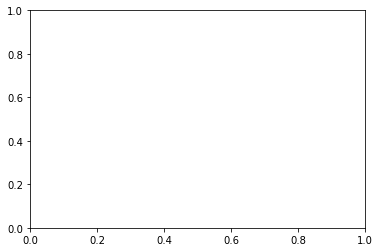

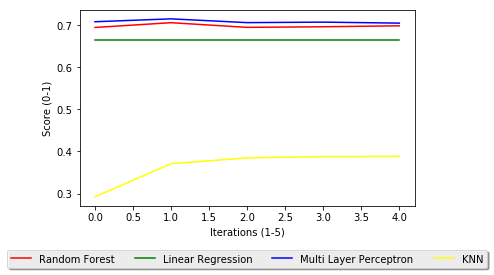

In [74]:
import matplotlib.pyplot as plt

range_itrs=np.arange(5)

fig = plt.figure()
graph = plt.subplot(111)

fig.gca().set_color_cycle(['red', 'green', 'blue', 'yellow'])

graph.plot(range_itrs,rf_accuracies)
graph.plot(range_itrs,lr_accuracies)
graph.plot(range_itrs,mlp_accuracies)
graph.plot(range_itrs,knn_accuracies)

graph.set_xlabel('Iterations (1-5)')
graph.set_ylabel('Score (0-1)')
#graph.legend(['Random Forest', 'Logistic Regression Classifier', 'Multi Layer Perceptron', 'KNN'], loc='upper left')

box = graph.get_position()
graph.set_position([box.x0, box.y0 + box.height * 0.1,box.width,box.height * 0.9])

graph.legend(['Random Forest', 'Linear Regression', 'Multi Layer Perceptron', 'KNN'],loc='upper center', bbox_to_anchor=(0.5, -0.2),fancybox=True, shadow=True, ncol=5)

plt.show()
fig.savefig("comparisons.jpg")

In [91]:
test_d_frame=pd.read_csv("test_set.csv",sep=",")
test_d_frame=test_d_frame.drop('Price',axis=1)
test_d_frame=test_d_frame.drop('Currency',axis=1)
test_d_frame.head(5)

,X2,X3,X4,X5,X6,ID
0,B_A,NaN,59.8,61.0,0.21,5224.0
1,D_C,VS1,59.4,61.0,0.23,53194.0
2,B_X,SI1,60.4,61.0,0.22,5457.0
3,B_A,SI2,60.2,62.0,0.20,27617.0
4,C_T,SI2,63.3,56.0,0.30,16197.0


In [93]:
org_frame=pd.read_csv("train_set.csv",sep=",")

org_frame=org_frame.drop('Price',axis=1)
org_frame=org_frame.drop('Currency',axis=1)

for clm in test_d_frame:
    
    data_clm=org_frame[clm]
    data_clm=data_clm.dropna()

    if clm!='ID':
        
        if is_numeric_dtype(data_clm):

            data_mean=np.mean(data_clm.values)
            test_d_frame[clm]=test_d_frame[clm].fillna(data_mean)
            print(clm,data_mean)
            
        else:
            
            clm_vals=list(data_clm.values)
            mean_val=max(clm_vals,key=clm_vals.count)
            test_d_frame[clm]=test_d_frame[clm].fillna(mean_val)
                        
            print (clm,mean_val)

X2 E_Y
X3 SI1
X4 61.7487168622
X5 57.4533462221
X6 0.799362700148


In [94]:
test_d_frame.head(5)

,X2,X3,X4,X5,X6,ID
0,B_A,SI1,59.8,61.0,0.21,5224.0
1,D_C,VS1,59.4,61.0,0.23,53194.0
2,B_X,SI1,60.4,61.0,0.22,5457.0
3,B_A,SI2,60.2,62.0,0.20,27617.0
4,C_T,SI2,63.3,56.0,0.30,16197.0


In [95]:
test_data_id=test_d_frame['ID']
test_d_frame=test_d_frame.drop('ID',axis=1)
test_data_id=test_data_id.values

In [96]:
test_d1=[]
test_d2=[]
test_d3=[]

for d_id in test_data_id:
    
    d_id=int(d_id)
    
    if d_id in id_dim_vals_with_avgs.keys():
    
        test_d1.append(id_dim_vals_with_avgs[d_id][1])
        test_d2.append(id_dim_vals_with_avgs[d_id][2])
        test_d3.append(id_dim_vals_with_avgs[d_id][3])
        
    else:
    
        test_d1.append(dim_avgs[1])
        test_d2.append(dim_avgs[2])
        test_d3.append(dim_avgs[3])

In [97]:
test_d_frame['D1']=test_d1
test_d_frame['D2']=test_d2
test_d_frame['D3']=test_d3

In [98]:
test_d_frame.head(5)

,X2,X3,X4,X5,X6,D1,D2,D3
0,B_A,SI1,59.8,61.0,0.21,6.57,6.59,4.05
1,D_C,VS1,59.4,61.0,0.23,5.73,5.59,3.46
2,B_X,SI1,60.4,61.0,0.22,6.43,6.47,4.00
3,B_A,SI2,60.2,62.0,0.20,8.71,5.73,5.58
4,C_T,SI2,63.3,56.0,0.30,6.80,5.73,4.23


In [99]:
X2_types=one_hot_X2.columns
X3_types=one_hot_X3.columns

test_one_hot_X2=pd.DataFrame(columns=X2_types)
test_one_hot_X3=pd.DataFrame(columns=X3_types)

for idx,row in test_d_frame.iterrows():
    
    oh_X2={X_type:0 for X_type in X2_types}
    
    if row['X2'] in X2_types:
        oh_X2[row['X2']]=1
    
    test_one_hot_X2.loc[idx]=list(oh_X2.values())
    
    oh_X3={X_type:0 for X_type in X3_types}
        
    if row['X3'] in X3_types:
        oh_X3[row['X3']]=1
    
    test_one_hot_X3.loc[idx]=list(oh_X3.values())
    
    print(idx,"/",test_d_frame.shape[0])

0 / 16181
1 / 16181
2 / 16181
3 / 16181
4 / 16181
5 / 16181
6 / 16181
7 / 16181
8 / 16181
9 / 16181
10 / 16181
11 / 16181
12 / 16181
13 / 16181
14 / 16181
15 / 16181
16 / 16181
17 / 16181
18 / 16181
19 / 16181
20 / 16181
21 / 16181
22 / 16181
23 / 16181
24 / 16181
25 / 16181
26 / 16181
27 / 16181
28 / 16181
29 / 16181
30 / 16181
31 / 16181
32 / 16181
33 / 16181
34 / 16181
35 / 16181
36 / 16181
37 / 16181
38 / 16181
39 / 16181
40 / 16181
41 / 16181
42 / 16181
43 / 16181
44 / 16181
45 / 16181
46 / 16181
47 / 16181
48 / 16181
49 / 16181
50 / 16181
51 / 16181
52 / 16181
53 / 16181
54 / 16181
55 / 16181
56 / 16181
57 / 16181
58 / 16181
59 / 16181
60 / 16181
61 / 16181
62 / 16181
63 / 16181
64 / 16181
65 / 16181
66 / 16181
67 / 16181
68 / 16181
69 / 16181
70 / 16181
71 / 16181
72 / 16181
73 / 16181
74 / 16181
75 / 16181
76 / 16181
77 / 16181
78 / 16181
79 / 16181
80 / 16181
81 / 16181
82 / 16181
83 / 16181
84 / 16181
85 / 16181
86 / 16181
87 / 16181
88 / 16181
89 / 16181
90 / 16181
91 / 1618

700 / 16181
701 / 16181
702 / 16181
703 / 16181
704 / 16181
705 / 16181
706 / 16181
707 / 16181
708 / 16181
709 / 16181
710 / 16181
711 / 16181
712 / 16181
713 / 16181
714 / 16181
715 / 16181
716 / 16181
717 / 16181
718 / 16181
719 / 16181
720 / 16181
721 / 16181
722 / 16181
723 / 16181
724 / 16181
725 / 16181
726 / 16181
727 / 16181
728 / 16181
729 / 16181
730 / 16181
731 / 16181
732 / 16181
733 / 16181
734 / 16181
735 / 16181
736 / 16181
737 / 16181
738 / 16181
739 / 16181
740 / 16181
741 / 16181
742 / 16181
743 / 16181
744 / 16181
745 / 16181
746 / 16181
747 / 16181
748 / 16181
749 / 16181
750 / 16181
751 / 16181
752 / 16181
753 / 16181
754 / 16181
755 / 16181
756 / 16181
757 / 16181
758 / 16181
759 / 16181
760 / 16181
761 / 16181
762 / 16181
763 / 16181
764 / 16181
765 / 16181
766 / 16181
767 / 16181
768 / 16181
769 / 16181
770 / 16181
771 / 16181
772 / 16181
773 / 16181
774 / 16181
775 / 16181
776 / 16181
777 / 16181
778 / 16181
779 / 16181
780 / 16181
781 / 16181
782 / 16181
783 

1354 / 16181
1355 / 16181
1356 / 16181
1357 / 16181
1358 / 16181
1359 / 16181
1360 / 16181
1361 / 16181
1362 / 16181
1363 / 16181
1364 / 16181
1365 / 16181
1366 / 16181
1367 / 16181
1368 / 16181
1369 / 16181
1370 / 16181
1371 / 16181
1372 / 16181
1373 / 16181
1374 / 16181
1375 / 16181
1376 / 16181
1377 / 16181
1378 / 16181
1379 / 16181
1380 / 16181
1381 / 16181
1382 / 16181
1383 / 16181
1384 / 16181
1385 / 16181
1386 / 16181
1387 / 16181
1388 / 16181
1389 / 16181
1390 / 16181
1391 / 16181
1392 / 16181
1393 / 16181
1394 / 16181
1395 / 16181
1396 / 16181
1397 / 16181
1398 / 16181
1399 / 16181
1400 / 16181
1401 / 16181
1402 / 16181
1403 / 16181
1404 / 16181
1405 / 16181
1406 / 16181
1407 / 16181
1408 / 16181
1409 / 16181
1410 / 16181
1411 / 16181
1412 / 16181
1413 / 16181
1414 / 16181
1415 / 16181
1416 / 16181
1417 / 16181
1418 / 16181
1419 / 16181
1420 / 16181
1421 / 16181
1422 / 16181
1423 / 16181
1424 / 16181
1425 / 16181
1426 / 16181
1427 / 16181
1428 / 16181
1429 / 16181
1430 / 16181

1995 / 16181
1996 / 16181
1997 / 16181
1998 / 16181
1999 / 16181
2000 / 16181
2001 / 16181
2002 / 16181
2003 / 16181
2004 / 16181
2005 / 16181
2006 / 16181
2007 / 16181
2008 / 16181
2009 / 16181
2010 / 16181
2011 / 16181
2012 / 16181
2013 / 16181
2014 / 16181
2015 / 16181
2016 / 16181
2017 / 16181
2018 / 16181
2019 / 16181
2020 / 16181
2021 / 16181
2022 / 16181
2023 / 16181
2024 / 16181
2025 / 16181
2026 / 16181
2027 / 16181
2028 / 16181
2029 / 16181
2030 / 16181
2031 / 16181
2032 / 16181
2033 / 16181
2034 / 16181
2035 / 16181
2036 / 16181
2037 / 16181
2038 / 16181
2039 / 16181
2040 / 16181
2041 / 16181
2042 / 16181
2043 / 16181
2044 / 16181
2045 / 16181
2046 / 16181
2047 / 16181
2048 / 16181
2049 / 16181
2050 / 16181
2051 / 16181
2052 / 16181
2053 / 16181
2054 / 16181
2055 / 16181
2056 / 16181
2057 / 16181
2058 / 16181
2059 / 16181
2060 / 16181
2061 / 16181
2062 / 16181
2063 / 16181
2064 / 16181
2065 / 16181
2066 / 16181
2067 / 16181
2068 / 16181
2069 / 16181
2070 / 16181
2071 / 16181

2647 / 16181
2648 / 16181
2649 / 16181
2650 / 16181
2651 / 16181
2652 / 16181
2653 / 16181
2654 / 16181
2655 / 16181
2656 / 16181
2657 / 16181
2658 / 16181
2659 / 16181
2660 / 16181
2661 / 16181
2662 / 16181
2663 / 16181
2664 / 16181
2665 / 16181
2666 / 16181
2667 / 16181
2668 / 16181
2669 / 16181
2670 / 16181
2671 / 16181
2672 / 16181
2673 / 16181
2674 / 16181
2675 / 16181
2676 / 16181
2677 / 16181
2678 / 16181
2679 / 16181
2680 / 16181
2681 / 16181
2682 / 16181
2683 / 16181
2684 / 16181
2685 / 16181
2686 / 16181
2687 / 16181
2688 / 16181
2689 / 16181
2690 / 16181
2691 / 16181
2692 / 16181
2693 / 16181
2694 / 16181
2695 / 16181
2696 / 16181
2697 / 16181
2698 / 16181
2699 / 16181
2700 / 16181
2701 / 16181
2702 / 16181
2703 / 16181
2704 / 16181
2705 / 16181
2706 / 16181
2707 / 16181
2708 / 16181
2709 / 16181
2710 / 16181
2711 / 16181
2712 / 16181
2713 / 16181
2714 / 16181
2715 / 16181
2716 / 16181
2717 / 16181
2718 / 16181
2719 / 16181
2720 / 16181
2721 / 16181
2722 / 16181
2723 / 16181

3281 / 16181
3282 / 16181
3283 / 16181
3284 / 16181
3285 / 16181
3286 / 16181
3287 / 16181
3288 / 16181
3289 / 16181
3290 / 16181
3291 / 16181
3292 / 16181
3293 / 16181
3294 / 16181
3295 / 16181
3296 / 16181
3297 / 16181
3298 / 16181
3299 / 16181
3300 / 16181
3301 / 16181
3302 / 16181
3303 / 16181
3304 / 16181
3305 / 16181
3306 / 16181
3307 / 16181
3308 / 16181
3309 / 16181
3310 / 16181
3311 / 16181
3312 / 16181
3313 / 16181
3314 / 16181
3315 / 16181
3316 / 16181
3317 / 16181
3318 / 16181
3319 / 16181
3320 / 16181
3321 / 16181
3322 / 16181
3323 / 16181
3324 / 16181
3325 / 16181
3326 / 16181
3327 / 16181
3328 / 16181
3329 / 16181
3330 / 16181
3331 / 16181
3332 / 16181
3333 / 16181
3334 / 16181
3335 / 16181
3336 / 16181
3337 / 16181
3338 / 16181
3339 / 16181
3340 / 16181
3341 / 16181
3342 / 16181
3343 / 16181
3344 / 16181
3345 / 16181
3346 / 16181
3347 / 16181
3348 / 16181
3349 / 16181
3350 / 16181
3351 / 16181
3352 / 16181
3353 / 16181
3354 / 16181
3355 / 16181
3356 / 16181
3357 / 16181

3930 / 16181
3931 / 16181
3932 / 16181
3933 / 16181
3934 / 16181
3935 / 16181
3936 / 16181
3937 / 16181
3938 / 16181
3939 / 16181
3940 / 16181
3941 / 16181
3942 / 16181
3943 / 16181
3944 / 16181
3945 / 16181
3946 / 16181
3947 / 16181
3948 / 16181
3949 / 16181
3950 / 16181
3951 / 16181
3952 / 16181
3953 / 16181
3954 / 16181
3955 / 16181
3956 / 16181
3957 / 16181
3958 / 16181
3959 / 16181
3960 / 16181
3961 / 16181
3962 / 16181
3963 / 16181
3964 / 16181
3965 / 16181
3966 / 16181
3967 / 16181
3968 / 16181
3969 / 16181
3970 / 16181
3971 / 16181
3972 / 16181
3973 / 16181
3974 / 16181
3975 / 16181
3976 / 16181
3977 / 16181
3978 / 16181
3979 / 16181
3980 / 16181
3981 / 16181
3982 / 16181
3983 / 16181
3984 / 16181
3985 / 16181
3986 / 16181
3987 / 16181
3988 / 16181
3989 / 16181
3990 / 16181
3991 / 16181
3992 / 16181
3993 / 16181
3994 / 16181
3995 / 16181
3996 / 16181
3997 / 16181
3998 / 16181
3999 / 16181
4000 / 16181
4001 / 16181
4002 / 16181
4003 / 16181
4004 / 16181
4005 / 16181
4006 / 16181

4567 / 16181
4568 / 16181
4569 / 16181
4570 / 16181
4571 / 16181
4572 / 16181
4573 / 16181
4574 / 16181
4575 / 16181
4576 / 16181
4577 / 16181
4578 / 16181
4579 / 16181
4580 / 16181
4581 / 16181
4582 / 16181
4583 / 16181
4584 / 16181
4585 / 16181
4586 / 16181
4587 / 16181
4588 / 16181
4589 / 16181
4590 / 16181
4591 / 16181
4592 / 16181
4593 / 16181
4594 / 16181
4595 / 16181
4596 / 16181
4597 / 16181
4598 / 16181
4599 / 16181
4600 / 16181
4601 / 16181
4602 / 16181
4603 / 16181
4604 / 16181
4605 / 16181
4606 / 16181
4607 / 16181
4608 / 16181
4609 / 16181
4610 / 16181
4611 / 16181
4612 / 16181
4613 / 16181
4614 / 16181
4615 / 16181
4616 / 16181
4617 / 16181
4618 / 16181
4619 / 16181
4620 / 16181
4621 / 16181
4622 / 16181
4623 / 16181
4624 / 16181
4625 / 16181
4626 / 16181
4627 / 16181
4628 / 16181
4629 / 16181
4630 / 16181
4631 / 16181
4632 / 16181
4633 / 16181
4634 / 16181
4635 / 16181
4636 / 16181
4637 / 16181
4638 / 16181
4639 / 16181
4640 / 16181
4641 / 16181
4642 / 16181
4643 / 16181

5201 / 16181
5202 / 16181
5203 / 16181
5204 / 16181
5205 / 16181
5206 / 16181
5207 / 16181
5208 / 16181
5209 / 16181
5210 / 16181
5211 / 16181
5212 / 16181
5213 / 16181
5214 / 16181
5215 / 16181
5216 / 16181
5217 / 16181
5218 / 16181
5219 / 16181
5220 / 16181
5221 / 16181
5222 / 16181
5223 / 16181
5224 / 16181
5225 / 16181
5226 / 16181
5227 / 16181
5228 / 16181
5229 / 16181
5230 / 16181
5231 / 16181
5232 / 16181
5233 / 16181
5234 / 16181
5235 / 16181
5236 / 16181
5237 / 16181
5238 / 16181
5239 / 16181
5240 / 16181
5241 / 16181
5242 / 16181
5243 / 16181
5244 / 16181
5245 / 16181
5246 / 16181
5247 / 16181
5248 / 16181
5249 / 16181
5250 / 16181
5251 / 16181
5252 / 16181
5253 / 16181
5254 / 16181
5255 / 16181
5256 / 16181
5257 / 16181
5258 / 16181
5259 / 16181
5260 / 16181
5261 / 16181
5262 / 16181
5263 / 16181
5264 / 16181
5265 / 16181
5266 / 16181
5267 / 16181
5268 / 16181
5269 / 16181
5270 / 16181
5271 / 16181
5272 / 16181
5273 / 16181
5274 / 16181
5275 / 16181
5276 / 16181
5277 / 16181

5837 / 16181
5838 / 16181
5839 / 16181
5840 / 16181
5841 / 16181
5842 / 16181
5843 / 16181
5844 / 16181
5845 / 16181
5846 / 16181
5847 / 16181
5848 / 16181
5849 / 16181
5850 / 16181
5851 / 16181
5852 / 16181
5853 / 16181
5854 / 16181
5855 / 16181
5856 / 16181
5857 / 16181
5858 / 16181
5859 / 16181
5860 / 16181
5861 / 16181
5862 / 16181
5863 / 16181
5864 / 16181
5865 / 16181
5866 / 16181
5867 / 16181
5868 / 16181
5869 / 16181
5870 / 16181
5871 / 16181
5872 / 16181
5873 / 16181
5874 / 16181
5875 / 16181
5876 / 16181
5877 / 16181
5878 / 16181
5879 / 16181
5880 / 16181
5881 / 16181
5882 / 16181
5883 / 16181
5884 / 16181
5885 / 16181
5886 / 16181
5887 / 16181
5888 / 16181
5889 / 16181
5890 / 16181
5891 / 16181
5892 / 16181
5893 / 16181
5894 / 16181
5895 / 16181
5896 / 16181
5897 / 16181
5898 / 16181
5899 / 16181
5900 / 16181
5901 / 16181
5902 / 16181
5903 / 16181
5904 / 16181
5905 / 16181
5906 / 16181
5907 / 16181
5908 / 16181
5909 / 16181
5910 / 16181
5911 / 16181
5912 / 16181
5913 / 16181

6479 / 16181
6480 / 16181
6481 / 16181
6482 / 16181
6483 / 16181
6484 / 16181
6485 / 16181
6486 / 16181
6487 / 16181
6488 / 16181
6489 / 16181
6490 / 16181
6491 / 16181
6492 / 16181
6493 / 16181
6494 / 16181
6495 / 16181
6496 / 16181
6497 / 16181
6498 / 16181
6499 / 16181
6500 / 16181
6501 / 16181
6502 / 16181
6503 / 16181
6504 / 16181
6505 / 16181
6506 / 16181
6507 / 16181
6508 / 16181
6509 / 16181
6510 / 16181
6511 / 16181
6512 / 16181
6513 / 16181
6514 / 16181
6515 / 16181
6516 / 16181
6517 / 16181
6518 / 16181
6519 / 16181
6520 / 16181
6521 / 16181
6522 / 16181
6523 / 16181
6524 / 16181
6525 / 16181
6526 / 16181
6527 / 16181
6528 / 16181
6529 / 16181
6530 / 16181
6531 / 16181
6532 / 16181
6533 / 16181
6534 / 16181
6535 / 16181
6536 / 16181
6537 / 16181
6538 / 16181
6539 / 16181
6540 / 16181
6541 / 16181
6542 / 16181
6543 / 16181
6544 / 16181
6545 / 16181
6546 / 16181
6547 / 16181
6548 / 16181
6549 / 16181
6550 / 16181
6551 / 16181
6552 / 16181
6553 / 16181
6554 / 16181
6555 / 16181

7124 / 16181
7125 / 16181
7126 / 16181
7127 / 16181
7128 / 16181
7129 / 16181
7130 / 16181
7131 / 16181
7132 / 16181
7133 / 16181
7134 / 16181
7135 / 16181
7136 / 16181
7137 / 16181
7138 / 16181
7139 / 16181
7140 / 16181
7141 / 16181
7142 / 16181
7143 / 16181
7144 / 16181
7145 / 16181
7146 / 16181
7147 / 16181
7148 / 16181
7149 / 16181
7150 / 16181
7151 / 16181
7152 / 16181
7153 / 16181
7154 / 16181
7155 / 16181
7156 / 16181
7157 / 16181
7158 / 16181
7159 / 16181
7160 / 16181
7161 / 16181
7162 / 16181
7163 / 16181
7164 / 16181
7165 / 16181
7166 / 16181
7167 / 16181
7168 / 16181
7169 / 16181
7170 / 16181
7171 / 16181
7172 / 16181
7173 / 16181
7174 / 16181
7175 / 16181
7176 / 16181
7177 / 16181
7178 / 16181
7179 / 16181
7180 / 16181
7181 / 16181
7182 / 16181
7183 / 16181
7184 / 16181
7185 / 16181
7186 / 16181
7187 / 16181
7188 / 16181
7189 / 16181
7190 / 16181
7191 / 16181
7192 / 16181
7193 / 16181
7194 / 16181
7195 / 16181
7196 / 16181
7197 / 16181
7198 / 16181
7199 / 16181
7200 / 16181

7765 / 16181
7766 / 16181
7767 / 16181
7768 / 16181
7769 / 16181
7770 / 16181
7771 / 16181
7772 / 16181
7773 / 16181
7774 / 16181
7775 / 16181
7776 / 16181
7777 / 16181
7778 / 16181
7779 / 16181
7780 / 16181
7781 / 16181
7782 / 16181
7783 / 16181
7784 / 16181
7785 / 16181
7786 / 16181
7787 / 16181
7788 / 16181
7789 / 16181
7790 / 16181
7791 / 16181
7792 / 16181
7793 / 16181
7794 / 16181
7795 / 16181
7796 / 16181
7797 / 16181
7798 / 16181
7799 / 16181
7800 / 16181
7801 / 16181
7802 / 16181
7803 / 16181
7804 / 16181
7805 / 16181
7806 / 16181
7807 / 16181
7808 / 16181
7809 / 16181
7810 / 16181
7811 / 16181
7812 / 16181
7813 / 16181
7814 / 16181
7815 / 16181
7816 / 16181
7817 / 16181
7818 / 16181
7819 / 16181
7820 / 16181
7821 / 16181
7822 / 16181
7823 / 16181
7824 / 16181
7825 / 16181
7826 / 16181
7827 / 16181
7828 / 16181
7829 / 16181
7830 / 16181
7831 / 16181
7832 / 16181
7833 / 16181
7834 / 16181
7835 / 16181
7836 / 16181
7837 / 16181
7838 / 16181
7839 / 16181
7840 / 16181
7841 / 16181

8398 / 16181
8399 / 16181
8400 / 16181
8401 / 16181
8402 / 16181
8403 / 16181
8404 / 16181
8405 / 16181
8406 / 16181
8407 / 16181
8408 / 16181
8409 / 16181
8410 / 16181
8411 / 16181
8412 / 16181
8413 / 16181
8414 / 16181
8415 / 16181
8416 / 16181
8417 / 16181
8418 / 16181
8419 / 16181
8420 / 16181
8421 / 16181
8422 / 16181
8423 / 16181
8424 / 16181
8425 / 16181
8426 / 16181
8427 / 16181
8428 / 16181
8429 / 16181
8430 / 16181
8431 / 16181
8432 / 16181
8433 / 16181
8434 / 16181
8435 / 16181
8436 / 16181
8437 / 16181
8438 / 16181
8439 / 16181
8440 / 16181
8441 / 16181
8442 / 16181
8443 / 16181
8444 / 16181
8445 / 16181
8446 / 16181
8447 / 16181
8448 / 16181
8449 / 16181
8450 / 16181
8451 / 16181
8452 / 16181
8453 / 16181
8454 / 16181
8455 / 16181
8456 / 16181
8457 / 16181
8458 / 16181
8459 / 16181
8460 / 16181
8461 / 16181
8462 / 16181
8463 / 16181
8464 / 16181
8465 / 16181
8466 / 16181
8467 / 16181
8468 / 16181
8469 / 16181
8470 / 16181
8471 / 16181
8472 / 16181
8473 / 16181
8474 / 16181

9034 / 16181
9035 / 16181
9036 / 16181
9037 / 16181
9038 / 16181
9039 / 16181
9040 / 16181
9041 / 16181
9042 / 16181
9043 / 16181
9044 / 16181
9045 / 16181
9046 / 16181
9047 / 16181
9048 / 16181
9049 / 16181
9050 / 16181
9051 / 16181
9052 / 16181
9053 / 16181
9054 / 16181
9055 / 16181
9056 / 16181
9057 / 16181
9058 / 16181
9059 / 16181
9060 / 16181
9061 / 16181
9062 / 16181
9063 / 16181
9064 / 16181
9065 / 16181
9066 / 16181
9067 / 16181
9068 / 16181
9069 / 16181
9070 / 16181
9071 / 16181
9072 / 16181
9073 / 16181
9074 / 16181
9075 / 16181
9076 / 16181
9077 / 16181
9078 / 16181
9079 / 16181
9080 / 16181
9081 / 16181
9082 / 16181
9083 / 16181
9084 / 16181
9085 / 16181
9086 / 16181
9087 / 16181
9088 / 16181
9089 / 16181
9090 / 16181
9091 / 16181
9092 / 16181
9093 / 16181
9094 / 16181
9095 / 16181
9096 / 16181
9097 / 16181
9098 / 16181
9099 / 16181
9100 / 16181
9101 / 16181
9102 / 16181
9103 / 16181
9104 / 16181
9105 / 16181
9106 / 16181
9107 / 16181
9108 / 16181
9109 / 16181
9110 / 16181

9671 / 16181
9672 / 16181
9673 / 16181
9674 / 16181
9675 / 16181
9676 / 16181
9677 / 16181
9678 / 16181
9679 / 16181
9680 / 16181
9681 / 16181
9682 / 16181
9683 / 16181
9684 / 16181
9685 / 16181
9686 / 16181
9687 / 16181
9688 / 16181
9689 / 16181
9690 / 16181
9691 / 16181
9692 / 16181
9693 / 16181
9694 / 16181
9695 / 16181
9696 / 16181
9697 / 16181
9698 / 16181
9699 / 16181
9700 / 16181
9701 / 16181
9702 / 16181
9703 / 16181
9704 / 16181
9705 / 16181
9706 / 16181
9707 / 16181
9708 / 16181
9709 / 16181
9710 / 16181
9711 / 16181
9712 / 16181
9713 / 16181
9714 / 16181
9715 / 16181
9716 / 16181
9717 / 16181
9718 / 16181
9719 / 16181
9720 / 16181
9721 / 16181
9722 / 16181
9723 / 16181
9724 / 16181
9725 / 16181
9726 / 16181
9727 / 16181
9728 / 16181
9729 / 16181
9730 / 16181
9731 / 16181
9732 / 16181
9733 / 16181
9734 / 16181
9735 / 16181
9736 / 16181
9737 / 16181
9738 / 16181
9739 / 16181
9740 / 16181
9741 / 16181
9742 / 16181
9743 / 16181
9744 / 16181
9745 / 16181
9746 / 16181
9747 / 16181

10283 / 16181
10284 / 16181
10285 / 16181
10286 / 16181
10287 / 16181
10288 / 16181
10289 / 16181
10290 / 16181
10291 / 16181
10292 / 16181
10293 / 16181
10294 / 16181
10295 / 16181
10296 / 16181
10297 / 16181
10298 / 16181
10299 / 16181
10300 / 16181
10301 / 16181
10302 / 16181
10303 / 16181
10304 / 16181
10305 / 16181
10306 / 16181
10307 / 16181
10308 / 16181
10309 / 16181
10310 / 16181
10311 / 16181
10312 / 16181
10313 / 16181
10314 / 16181
10315 / 16181
10316 / 16181
10317 / 16181
10318 / 16181
10319 / 16181
10320 / 16181
10321 / 16181
10322 / 16181
10323 / 16181
10324 / 16181
10325 / 16181
10326 / 16181
10327 / 16181
10328 / 16181
10329 / 16181
10330 / 16181
10331 / 16181
10332 / 16181
10333 / 16181
10334 / 16181
10335 / 16181
10336 / 16181
10337 / 16181
10338 / 16181
10339 / 16181
10340 / 16181
10341 / 16181
10342 / 16181
10343 / 16181
10344 / 16181
10345 / 16181
10346 / 16181
10347 / 16181
10348 / 16181
10349 / 16181
10350 / 16181
10351 / 16181
10352 / 16181
10353 / 16181
10354 

10879 / 16181
10880 / 16181
10881 / 16181
10882 / 16181
10883 / 16181
10884 / 16181
10885 / 16181
10886 / 16181
10887 / 16181
10888 / 16181
10889 / 16181
10890 / 16181
10891 / 16181
10892 / 16181
10893 / 16181
10894 / 16181
10895 / 16181
10896 / 16181
10897 / 16181
10898 / 16181
10899 / 16181
10900 / 16181
10901 / 16181
10902 / 16181
10903 / 16181
10904 / 16181
10905 / 16181
10906 / 16181
10907 / 16181
10908 / 16181
10909 / 16181
10910 / 16181
10911 / 16181
10912 / 16181
10913 / 16181
10914 / 16181
10915 / 16181
10916 / 16181
10917 / 16181
10918 / 16181
10919 / 16181
10920 / 16181
10921 / 16181
10922 / 16181
10923 / 16181
10924 / 16181
10925 / 16181
10926 / 16181
10927 / 16181
10928 / 16181
10929 / 16181
10930 / 16181
10931 / 16181
10932 / 16181
10933 / 16181
10934 / 16181
10935 / 16181
10936 / 16181
10937 / 16181
10938 / 16181
10939 / 16181
10940 / 16181
10941 / 16181
10942 / 16181
10943 / 16181
10944 / 16181
10945 / 16181
10946 / 16181
10947 / 16181
10948 / 16181
10949 / 16181
10950 

11470 / 16181
11471 / 16181
11472 / 16181
11473 / 16181
11474 / 16181
11475 / 16181
11476 / 16181
11477 / 16181
11478 / 16181
11479 / 16181
11480 / 16181
11481 / 16181
11482 / 16181
11483 / 16181
11484 / 16181
11485 / 16181
11486 / 16181
11487 / 16181
11488 / 16181
11489 / 16181
11490 / 16181
11491 / 16181
11492 / 16181
11493 / 16181
11494 / 16181
11495 / 16181
11496 / 16181
11497 / 16181
11498 / 16181
11499 / 16181
11500 / 16181
11501 / 16181
11502 / 16181
11503 / 16181
11504 / 16181
11505 / 16181
11506 / 16181
11507 / 16181
11508 / 16181
11509 / 16181
11510 / 16181
11511 / 16181
11512 / 16181
11513 / 16181
11514 / 16181
11515 / 16181
11516 / 16181
11517 / 16181
11518 / 16181
11519 / 16181
11520 / 16181
11521 / 16181
11522 / 16181
11523 / 16181
11524 / 16181
11525 / 16181
11526 / 16181
11527 / 16181
11528 / 16181
11529 / 16181
11530 / 16181
11531 / 16181
11532 / 16181
11533 / 16181
11534 / 16181
11535 / 16181
11536 / 16181
11537 / 16181
11538 / 16181
11539 / 16181
11540 / 16181
11541 

12057 / 16181
12058 / 16181
12059 / 16181
12060 / 16181
12061 / 16181
12062 / 16181
12063 / 16181
12064 / 16181
12065 / 16181
12066 / 16181
12067 / 16181
12068 / 16181
12069 / 16181
12070 / 16181
12071 / 16181
12072 / 16181
12073 / 16181
12074 / 16181
12075 / 16181
12076 / 16181
12077 / 16181
12078 / 16181
12079 / 16181
12080 / 16181
12081 / 16181
12082 / 16181
12083 / 16181
12084 / 16181
12085 / 16181
12086 / 16181
12087 / 16181
12088 / 16181
12089 / 16181
12090 / 16181
12091 / 16181
12092 / 16181
12093 / 16181
12094 / 16181
12095 / 16181
12096 / 16181
12097 / 16181
12098 / 16181
12099 / 16181
12100 / 16181
12101 / 16181
12102 / 16181
12103 / 16181
12104 / 16181
12105 / 16181
12106 / 16181
12107 / 16181
12108 / 16181
12109 / 16181
12110 / 16181
12111 / 16181
12112 / 16181
12113 / 16181
12114 / 16181
12115 / 16181
12116 / 16181
12117 / 16181
12118 / 16181
12119 / 16181
12120 / 16181
12121 / 16181
12122 / 16181
12123 / 16181
12124 / 16181
12125 / 16181
12126 / 16181
12127 / 16181
12128 

12648 / 16181
12649 / 16181
12650 / 16181
12651 / 16181
12652 / 16181
12653 / 16181
12654 / 16181
12655 / 16181
12656 / 16181
12657 / 16181
12658 / 16181
12659 / 16181
12660 / 16181
12661 / 16181
12662 / 16181
12663 / 16181
12664 / 16181
12665 / 16181
12666 / 16181
12667 / 16181
12668 / 16181
12669 / 16181
12670 / 16181
12671 / 16181
12672 / 16181
12673 / 16181
12674 / 16181
12675 / 16181
12676 / 16181
12677 / 16181
12678 / 16181
12679 / 16181
12680 / 16181
12681 / 16181
12682 / 16181
12683 / 16181
12684 / 16181
12685 / 16181
12686 / 16181
12687 / 16181
12688 / 16181
12689 / 16181
12690 / 16181
12691 / 16181
12692 / 16181
12693 / 16181
12694 / 16181
12695 / 16181
12696 / 16181
12697 / 16181
12698 / 16181
12699 / 16181
12700 / 16181
12701 / 16181
12702 / 16181
12703 / 16181
12704 / 16181
12705 / 16181
12706 / 16181
12707 / 16181
12708 / 16181
12709 / 16181
12710 / 16181
12711 / 16181
12712 / 16181
12713 / 16181
12714 / 16181
12715 / 16181
12716 / 16181
12717 / 16181
12718 / 16181
12719 

13242 / 16181
13243 / 16181
13244 / 16181
13245 / 16181
13246 / 16181
13247 / 16181
13248 / 16181
13249 / 16181
13250 / 16181
13251 / 16181
13252 / 16181
13253 / 16181
13254 / 16181
13255 / 16181
13256 / 16181
13257 / 16181
13258 / 16181
13259 / 16181
13260 / 16181
13261 / 16181
13262 / 16181
13263 / 16181
13264 / 16181
13265 / 16181
13266 / 16181
13267 / 16181
13268 / 16181
13269 / 16181
13270 / 16181
13271 / 16181
13272 / 16181
13273 / 16181
13274 / 16181
13275 / 16181
13276 / 16181
13277 / 16181
13278 / 16181
13279 / 16181
13280 / 16181
13281 / 16181
13282 / 16181
13283 / 16181
13284 / 16181
13285 / 16181
13286 / 16181
13287 / 16181
13288 / 16181
13289 / 16181
13290 / 16181
13291 / 16181
13292 / 16181
13293 / 16181
13294 / 16181
13295 / 16181
13296 / 16181
13297 / 16181
13298 / 16181
13299 / 16181
13300 / 16181
13301 / 16181
13302 / 16181
13303 / 16181
13304 / 16181
13305 / 16181
13306 / 16181
13307 / 16181
13308 / 16181
13309 / 16181
13310 / 16181
13311 / 16181
13312 / 16181
13313 

13835 / 16181
13836 / 16181
13837 / 16181
13838 / 16181
13839 / 16181
13840 / 16181
13841 / 16181
13842 / 16181
13843 / 16181
13844 / 16181
13845 / 16181
13846 / 16181
13847 / 16181
13848 / 16181
13849 / 16181
13850 / 16181
13851 / 16181
13852 / 16181
13853 / 16181
13854 / 16181
13855 / 16181
13856 / 16181
13857 / 16181
13858 / 16181
13859 / 16181
13860 / 16181
13861 / 16181
13862 / 16181
13863 / 16181
13864 / 16181
13865 / 16181
13866 / 16181
13867 / 16181
13868 / 16181
13869 / 16181
13870 / 16181
13871 / 16181
13872 / 16181
13873 / 16181
13874 / 16181
13875 / 16181
13876 / 16181
13877 / 16181
13878 / 16181
13879 / 16181
13880 / 16181
13881 / 16181
13882 / 16181
13883 / 16181
13884 / 16181
13885 / 16181
13886 / 16181
13887 / 16181
13888 / 16181
13889 / 16181
13890 / 16181
13891 / 16181
13892 / 16181
13893 / 16181
13894 / 16181
13895 / 16181
13896 / 16181
13897 / 16181
13898 / 16181
13899 / 16181
13900 / 16181
13901 / 16181
13902 / 16181
13903 / 16181
13904 / 16181
13905 / 16181
13906 

14426 / 16181
14427 / 16181
14428 / 16181
14429 / 16181
14430 / 16181
14431 / 16181
14432 / 16181
14433 / 16181
14434 / 16181
14435 / 16181
14436 / 16181
14437 / 16181
14438 / 16181
14439 / 16181
14440 / 16181
14441 / 16181
14442 / 16181
14443 / 16181
14444 / 16181
14445 / 16181
14446 / 16181
14447 / 16181
14448 / 16181
14449 / 16181
14450 / 16181
14451 / 16181
14452 / 16181
14453 / 16181
14454 / 16181
14455 / 16181
14456 / 16181
14457 / 16181
14458 / 16181
14459 / 16181
14460 / 16181
14461 / 16181
14462 / 16181
14463 / 16181
14464 / 16181
14465 / 16181
14466 / 16181
14467 / 16181
14468 / 16181
14469 / 16181
14470 / 16181
14471 / 16181
14472 / 16181
14473 / 16181
14474 / 16181
14475 / 16181
14476 / 16181
14477 / 16181
14478 / 16181
14479 / 16181
14480 / 16181
14481 / 16181
14482 / 16181
14483 / 16181
14484 / 16181
14485 / 16181
14486 / 16181
14487 / 16181
14488 / 16181
14489 / 16181
14490 / 16181
14491 / 16181
14492 / 16181
14493 / 16181
14494 / 16181
14495 / 16181
14496 / 16181
14497 

15021 / 16181
15022 / 16181
15023 / 16181
15024 / 16181
15025 / 16181
15026 / 16181
15027 / 16181
15028 / 16181
15029 / 16181
15030 / 16181
15031 / 16181
15032 / 16181
15033 / 16181
15034 / 16181
15035 / 16181
15036 / 16181
15037 / 16181
15038 / 16181
15039 / 16181
15040 / 16181
15041 / 16181
15042 / 16181
15043 / 16181
15044 / 16181
15045 / 16181
15046 / 16181
15047 / 16181
15048 / 16181
15049 / 16181
15050 / 16181
15051 / 16181
15052 / 16181
15053 / 16181
15054 / 16181
15055 / 16181
15056 / 16181
15057 / 16181
15058 / 16181
15059 / 16181
15060 / 16181
15061 / 16181
15062 / 16181
15063 / 16181
15064 / 16181
15065 / 16181
15066 / 16181
15067 / 16181
15068 / 16181
15069 / 16181
15070 / 16181
15071 / 16181
15072 / 16181
15073 / 16181
15074 / 16181
15075 / 16181
15076 / 16181
15077 / 16181
15078 / 16181
15079 / 16181
15080 / 16181
15081 / 16181
15082 / 16181
15083 / 16181
15084 / 16181
15085 / 16181
15086 / 16181
15087 / 16181
15088 / 16181
15089 / 16181
15090 / 16181
15091 / 16181
15092 

15615 / 16181
15616 / 16181
15617 / 16181
15618 / 16181
15619 / 16181
15620 / 16181
15621 / 16181
15622 / 16181
15623 / 16181
15624 / 16181
15625 / 16181
15626 / 16181
15627 / 16181
15628 / 16181
15629 / 16181
15630 / 16181
15631 / 16181
15632 / 16181
15633 / 16181
15634 / 16181
15635 / 16181
15636 / 16181
15637 / 16181
15638 / 16181
15639 / 16181
15640 / 16181
15641 / 16181
15642 / 16181
15643 / 16181
15644 / 16181
15645 / 16181
15646 / 16181
15647 / 16181
15648 / 16181
15649 / 16181
15650 / 16181
15651 / 16181
15652 / 16181
15653 / 16181
15654 / 16181
15655 / 16181
15656 / 16181
15657 / 16181
15658 / 16181
15659 / 16181
15660 / 16181
15661 / 16181
15662 / 16181
15663 / 16181
15664 / 16181
15665 / 16181
15666 / 16181
15667 / 16181
15668 / 16181
15669 / 16181
15670 / 16181
15671 / 16181
15672 / 16181
15673 / 16181
15674 / 16181
15675 / 16181
15676 / 16181
15677 / 16181
15678 / 16181
15679 / 16181
15680 / 16181
15681 / 16181
15682 / 16181
15683 / 16181
15684 / 16181
15685 / 16181
15686 

In [100]:
test_d_frame=test_d_frame.drop('X2',axis=1)
test_d_frame=test_d_frame.drop('X3',axis=1)

test_d_frame=test_d_frame.join(test_one_hot_X2)
test_d_frame=test_d_frame.join(test_one_hot_X3)

test_d_frame.head(5)

,X4,X5,X6,D1,D2,D3,A_A,A_C,A_P,A_R,...,E_X,E_Y,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,59.8,61.0,0.21,6.57,6.59,4.05,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,59.4,61.0,0.23,5.73,5.59,3.46,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,60.4,61.0,0.22,6.43,6.47,4.00,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,60.2,62.0,0.20,8.71,5.73,5.58,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,63.3,56.0,0.30,6.80,5.73,4.23,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [101]:
test_set=test_d_frame.values

In [102]:
mlp_reg=MLPRegressor(hidden_layer_sizes=(100,200,100))
mlp_reg.fit(x_data,y_data)
preds=mlp_reg.predict(test_set)

In [104]:
print(preds)

[  341.29713943   644.03194126   372.41958697 ...,  2315.23787209
  2700.89430177  2363.43041252]


In [112]:
file = open('predictions.csv','w') 
file.write('ID,predicted_price\n')
for idx in range(len(preds)):
    file.write(str(int(test_data_id[idx]))+","+str(preds[idx])+"\n")
file.close()